# **Actividad de clasificación**

Héctor Manuel Cárdenas Yáñez - A01634615

In [ ]:
# Importar Librerias

import random
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, RFE

## **Actividad 1**



In [ ]:
# Cargar la actividad
data = np.loadtxt("P1_3.txt")
x = data[:,2:]
y = data[:,0]

1.
### Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [ ]:
# Calcular la cantidad de muestras de cada clase
cantidad_clase_1 = np.sum(y == 1)
cantidad_clase_2 = np.sum(y == 2)

# Imprimir la cantidad de muestras de cada clase
print(f'Cantidad de muestras de clase 1: {cantidad_clase_1}')
print(f'Cantidad de muestras de clase 2: {cantidad_clase_2}')

Cantidad de muestras de clase 1: 298
Cantidad de muestras de clase 2: 1496


In [ ]:
##### Accuracy with imbalanced sample #####

print("----- Imbalanced sample -----")
x = data[:,2:]
y = data[:,0]

kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'linear')

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (Subsamplig) #####

print("----- Subsamplig -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (Upsampling) #####
print("----- Upsampling -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)

    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (weighted loss function) #####

print("----- Weighted loss function -----")
x = data[:,2:]
y = data[:,0]

clf = SVC(kernel = 'linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Imbalanced sample -----
              precision    recall  f1-score   support

         1.0       0.74      0.68      0.71       298
         2.0       0.94      0.95      0.94      1496

    accuracy                           0.91      1794
   macro avg       0.84      0.82      0.83      1794
weighted avg       0.90      0.91      0.91      1794

----- Subsamplig -----
              precision    recall  f1-score   support

         1.0       0.50      0.83      0.62       298
         2.0       0.96      0.83      0.89      1496

    accuracy                           0.83      1794
   macro avg       0.73      0.83      0.76      1794
weighted avg       0.88      0.83      0.85      1794

----- Upsampling -----
              precision    recall  f1-score   support

         1.0       0.58      0.84      0.69       298
         2.0       0.96      0.88      0.92      1496

    accuracy                           0.87      1794
   macro avg       0.77      0.86      0.80      179

2.
### Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [ ]:
features = x
n_features = len(x)

# Linear SVM
print('----- Linear-SVM -----')
clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.74      0.67      0.70       298
         2.0       0.94      0.95      0.94      1496

    accuracy                           0.91      1794
   macro avg       0.84      0.81      0.82      1794
weighted avg       0.90      0.91      0.90      1794



In [ ]:
# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.64      0.41      0.50       298
         2.0       0.89      0.95      0.92      1496

    accuracy                           0.86      1794
   macro avg       0.76      0.68      0.71      1794
weighted avg       0.85      0.86      0.85      1794



In [ ]:
# RBF SVM
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'rbf')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- RBF-SVM -----
              precision    recall  f1-score   support

         1.0       0.88      0.59      0.70       298
         2.0       0.92      0.98      0.95      1496

    accuracy                           0.92      1794
   macro avg       0.90      0.79      0.83      1794
weighted avg       0.92      0.92      0.91      1794



In [ ]:
# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.69      0.63      0.66       298
         2.0       0.93      0.94      0.94      1496

    accuracy                           0.89      1794
   macro avg       0.81      0.79      0.80      1794
weighted avg       0.89      0.89      0.89      1794



In [ ]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.43      0.41      0.42       298
         2.0       0.88      0.89      0.89      1496

    accuracy                           0.81      1794
   macro avg       0.65      0.65      0.65      1794
weighted avg       0.81      0.81      0.81      1794



3.
### Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.

In [ ]:
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos un modelo de regresión logística
model = LogisticRegression()

# Entrenamos el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 89.97%


4.
### Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter

----- Feature selection using 50% of predictors -----
Selected features:  ['x12' 'x16' 'x17' 'x18' 'x19' 'x20']
              precision    recall  f1-score   support

         1.0       0.73      0.19      0.30       298
         2.0       0.86      0.99      0.92      1496

    accuracy                           0.85      1794
   macro avg       0.79      0.59      0.61      1794
weighted avg       0.84      0.85      0.82      1794

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.8338914738332738
---- n features = 2
ACC: 0.8338914738332738
---- n features = 3
ACC: 0.8338914738332738
---- n features = 4
ACC: 0.8400242759994399
---- n features = 5
ACC: 0.8533900810756135
---- n features = 6
ACC: 0.8561927140878604
---- n features = 7
ACC: 0.8673472245996795
---- n features = 8
ACC: 0.8684458691897106
---- n features = 9
ACC: 0.8745848959711179
---- n features = 10
ACC: 0.875137330573754
---- n features = 11
ACC: 0.8795879304710477
---- n features = 12
ACC

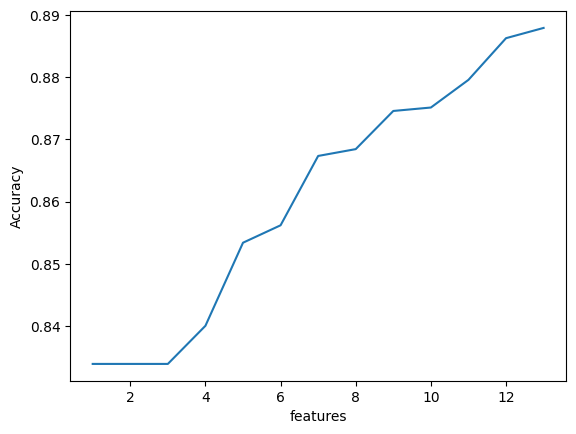

Selected features:  ['x11' 'x12' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x27' 'x28' 'x29' 'x64'
 'x65']


SVC(kernel='linear')

In [ ]:
# Reduce number of features to the half

print("----- Feature selection using 50% of predictors -----")

# Select features
fselection = SelectKBest(f_classif, k = 6)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
clf = SVC(kernel = 'linear')
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel = 'linear')

    fselection_cv = SelectKBest(f_classif, k = 6)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


# Find optimal number of features using cross-validation

print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

5.
### Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.

In [ ]:
# Reduce number of features to the half
print("----- Feature selection using 50% of predictors -----")

# Select features
clf = SVC(kernel = 'linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select = 0.5)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle = True)
for train_index, test_index in kf.split(x, y):

  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]
  clf_cv = SVC(kernel = 'linear')
  fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=0.5)
  fselection_cv.fit(x_train, y_train)
  x_train = fselection_cv.transform(x_train)
  clf_cv.fit(x_train, y_train)

  # Test phase
  x_test = fselection_cv.transform(x[test_index, :])
  y_test = y[test_index]
  y_pred = clf_cv.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Find optimal number of features using cross-validation
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
acc_nfeat = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  acc_cv = []
  kf = StratifiedKFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf_cv = SVC(kernel = 'linear')
    fselection_cv = SequentialFeatureSelector(clf_cv,
    n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)
    acc_i = accuracy_score(y_test, y_pred)
    acc_cv.append(acc_i)

  acc = np.average(acc_cv)
  acc_nfeat.append(acc)
  print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select = opt_features)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

No es posible implementar el método de Wrapper. Tarda demasiado corriendo y eventualmente regresa un error.

6.
### Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.

In [ ]:
# Reduce number of features to the half

print("----- Feature selection using 50% of predictors -----")

# Select features
clf = SVC(kernel = 'linear')
fselection = RFE(clf, n_features_to_select = 0.5)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle = True)
for train_index, test_index in kf.split(x, y):

  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]
  clf_cv = SVC(kernel = 'linear')
  fselection_cv = RFE(clf_cv, n_features_to_select=0.5)
  fselection_cv.fit(x_train, y_train)
  x_train = fselection_cv.transform(x_train)
  clf_cv.fit(x_train, y_train)

  # Test phase
  x_test = fselection_cv.transform(x[test_index, :])
  y_test = y[test_index]
  y_pred = clf_cv.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Find optimal number of features using cross-validation

print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
acc_nfeat = []
for n_feat in n_feats:
  print('---- n features =', n_feat)
  acc_cv = []
  kf = StratifiedKFold(n_splits=5, shuffle = True)

  for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf_cv = SVC(kernel = 'linear')
    fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)
    acc_i = accuracy_score(y_test, y_pred)
    acc_cv.append(acc_i)

  acc = np.average(acc_cv)
  acc_nfeat.append(acc)
  print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

El código tarda más de 20 minutos para correr. Si bien si es posible implementar el método Filter-Wrapper para este escenario, no es los más conveniente. El tiempo que se tarda considerando el tamñano de la muestra demuestra que no es el método más efficiente.

7.
### Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:

A. Aplica el método de selección de características con todos los datos.

B. Ajusta el modelo con las características encontradas.

----- Feature selection using 50% of predictors -----
Selected features:  ['x12' 'x16' 'x17' 'x18' 'x19' 'x20']
              precision    recall  f1-score   support

         1.0       0.73      0.25      0.37       298
         2.0       0.87      0.98      0.92      1496

    accuracy                           0.86      1794
   macro avg       0.80      0.62      0.65      1794
weighted avg       0.84      0.86      0.83      1794

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.8338914738332738
---- n features = 2
ACC: 0.8338914738332738
---- n features = 3
ACC: 0.8338914738332738
---- n features = 4
ACC: 0.8383560791148597
---- n features = 5
ACC: 0.8539580772163522
---- n features = 6
ACC: 0.859538444779882
---- n features = 7
ACC: 0.8623083985621139
---- n features = 8
ACC: 0.872347146791989
---- n features = 9
ACC: 0.8757022144068719
---- n features = 10
ACC: 0.8784768366505344
---- n features = 11
ACC: 0.8795972673939092
---- n features = 12
ACC:

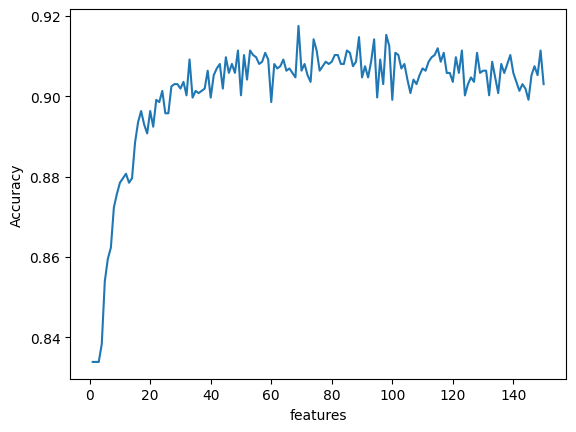

Selected features:  ['x2' 'x9' 'x10' 'x11' 'x12' 'x13' 'x15' 'x16' 'x17' 'x18' 'x19' 'x20'
 'x21' 'x22' 'x24' 'x25' 'x26' 'x27' 'x28' 'x29' 'x30' 'x31' 'x42' 'x43'
 'x49' 'x50' 'x60' 'x61' 'x62' 'x63' 'x64' 'x65' 'x66' 'x67' 'x70' 'x71'
 'x75' 'x76' 'x77' 'x78' 'x79' 'x89' 'x90' 'x96' 'x97' 'x98' 'x99' 'x100'
 'x101' 'x104' 'x105' 'x111' 'x112' 'x113' 'x114' 'x118' 'x119' 'x127'
 'x128' 'x129' 'x130' 'x132' 'x133' 'x139' 'x140' 'x141' 'x148' 'x149'
 'x150']


SVC(kernel='linear')

In [ ]:
# Reduce number of features to the half
print("----- Feature selection using 50% of predictors -----")

# Select features
fselection = SelectKBest(f_classif, k = 6)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
clf = SVC(kernel = 'linear')
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel = 'linear')

    fselection_cv = SelectKBest(f_classif, k = 6)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


# Find optimal number of features using cross-validation
print("----- Optimal selection of number of features -----")

n_feats = [i for i in range (1,151)]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

8.
### Contesta las siguientes preguntas:


**A. ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**

Si no se consideramos que los datos esten desbalanceados, es probable que el modelo de regresión logística (o cualquier otro modelo) se sesgue hacia la clase mayoritaria. Esto basicamente resulta en tener un rendimiento deficiente en la clasificación de la clase minoritaria. Como resultado, la precisión del modelo puede ser alta debido a la clasificación correcta de la clase mayoritaria, pero el rendimiento en la clase minoritaria será muy deficiente. Es importante abordar el problema de desbalance de clases para obtener una evaluación justa del rendimiento del modelo.

**B. De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**

Después de probar cinco modelos de clasificación, considero que el modelo más optimo para manejar el desbalance de los datos es el de RBF - SVM. La presición del modelo en ambas clases es muy alto de 88 y 92 respectivamente, por lo que el modelo otorga una clasificación justa para ambas clases.

**C. ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?**

Reducir la dimensionalidad del problema podría ser beneficioso para el rendimiento y eficiencia computacional. Podemos implementar técnicas como Análisis de Componentes Principales (PCA) para mantener la mayor parte de la varianza de los datos mientras se reduce el número de características. Esto puede ayudar a reducir el riesgo de sobreajuste y mejorar la eficiencia del modelo. Sin embargo, es importante tener en cuenta que la reducción de dimensionalidad también puede llevar a la pérdida de información relevante, por lo que debemos evaluar cuidadosamente el impacto que pueda llegar a tener para el modelo.

**D. ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**

El método clasificador de Filter. Es bastante sencillo, es el único que funciona. Los resultados son bastantes óptimos y es el único de los tres que ejecuta el modelo en un tiempo efficiente.

**E. Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**

Ajustar los hiperparámetros del modelo, de esta manera podríamos mejorar el rendimiento. También podriamos crear nuevas características relevantes a partir de las existentes para mejorar la capacidad predictiva del modelo. Otro forma seria combinar varios modelos para mejorar la generalización.

## **Actividad 2**

In [ ]:
# Cargar los datos
data = np.loadtxt('M_1.txt')
x = data[:,2:]
y = data[:,0]

### Paso 1
Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [ ]:
# Calcular la cantidad de muestras de cada clase
cantidad_clase_1 = np.sum(y == 1)
cantidad_clase_2 = np.sum(y == 2)
cantidad_clase_3 = np.sum(y == 3)
cantidad_clase_4 = np.sum(y == 4)
cantidad_clase_5 = np.sum(y == 5)
cantidad_clase_6 = np.sum(y == 6)
cantidad_clase_7 = np.sum(y == 7)

# Imprimir la cantidad de muestras de cada clase
print(f'Cantidad de muestras de clase 1: {cantidad_clase_1}')
print(f'Cantidad de muestras de clase 2: {cantidad_clase_2}')
print(f'Cantidad de muestras de clase 3: {cantidad_clase_3}')
print(f'Cantidad de muestras de clase 4: {cantidad_clase_4}')
print(f'Cantidad de muestras de clase 5: {cantidad_clase_5}')
print(f'Cantidad de muestras de clase 6: {cantidad_clase_6}')
print(f'Cantidad de muestras de clase 7: {cantidad_clase_7}')

Cantidad de muestras de clase 1: 90
Cantidad de muestras de clase 2: 90
Cantidad de muestras de clase 3: 90
Cantidad de muestras de clase 4: 90
Cantidad de muestras de clase 5: 90
Cantidad de muestras de clase 6: 90
Cantidad de muestras de clase 7: 90


### Paso 2
Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [ ]:
# Linear SVM
features = x
n_features = len(x)

# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99        90
         2.0       0.95      0.98      0.96        90
         3.0       0.96      0.98      0.97        90
         4.0       1.00      0.99      0.99        90
         5.0       0.99      0.97      0.98        90
         6.0       0.94      0.91      0.93        90
         7.0       0.99      1.00      0.99        90

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



In [ ]:
# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98        90
         2.0       0.89      0.99      0.94        90
         3.0       0.96      0.91      0.94        90
         4.0       1.00      1.00      1.00        90
         5.0       1.00      0.92      0.96        90
         6.0       0.93      0.92      0.93        90
         7.0       0.99      1.00      0.99        90

    accuracy                           0.96       630
   macro avg       0.96      0.96      0.96       630
weighted avg       0.96      0.96      0.96       630



In [ ]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.90      0.87      0.88        90
         2.0       0.75      0.77      0.76        90
         3.0       0.90      0.84      0.87        90
         4.0       0.85      0.88      0.86        90
         5.0       0.88      0.86      0.87        90
         6.0       0.73      0.80      0.76        90
         7.0       0.98      0.94      0.96        90

    accuracy                           0.85       630
   macro avg       0.85      0.85      0.85       630
weighted avg       0.85      0.85      0.85       630



In [ ]:
# RBM SVM
features = x
n_features = len(x)

# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99        90
         2.0       0.94      0.99      0.96        90
         3.0       0.98      0.97      0.97        90
         4.0       1.00      0.99      0.99        90
         5.0       0.99      0.98      0.98        90
         6.0       0.95      0.92      0.94        90
         7.0       0.99      1.00      0.99        90

    accuracy                           0.98       630
   macro avg       0.98      0.98      0.98       630
weighted avg       0.98      0.98      0.98       630



In [ ]:
# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.85      0.83      0.84        90
         2.0       0.74      0.78      0.76        90
         3.0       0.78      0.74      0.76        90
         4.0       0.94      0.97      0.95        90
         5.0       0.87      0.77      0.82        90
         6.0       0.64      0.72      0.68        90
         7.0       0.99      0.97      0.98        90

    accuracy                           0.83       630
   macro avg       0.83      0.83      0.83       630
weighted avg       0.83      0.83      0.83       630



### Paso 3
Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

In [ ]:
# Hiperparámetros con SVM

# Regularization parameter of the linear SVM classifier
print("----- SVM classifier - Regularization parameter -----")

cc = np.logspace(-3, 1, 100)

acc = []

for c in cc:
    print('---- C =', c)

    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(C=c, kernel = 'linear')

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)

    print('ACC:', acc_hyp)

Optimal C:  0.00210490414451202


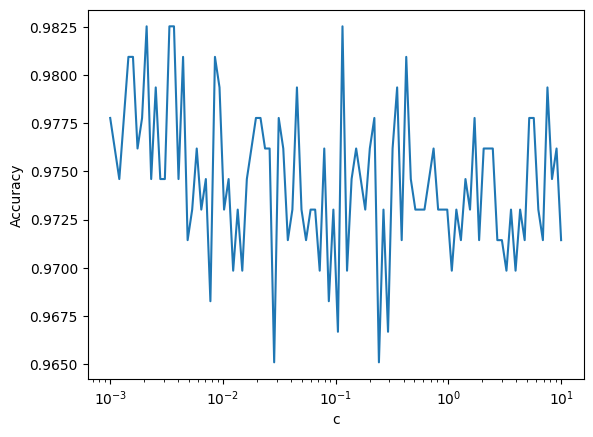

SVC(C=0.00210490414451202, kernel='linear')

In [ ]:
opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel = 'linear')
clf.fit(x, y)

In [ ]:
# Hiperparámetros con RMB-SVM

# Smoothing parameter of the RB-SVM classifier
print("----- RB-SVM classifier - Smoothing parameter -----")

gg = np.logspace(-5, -1, 100)
acc = []

for g in gg:
    print('---- gamma =', g)

    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel ='rbf', gamma = g)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)

    print('ACC:', acc_hyp)

Optimal gamma:  0.0024201282647943836


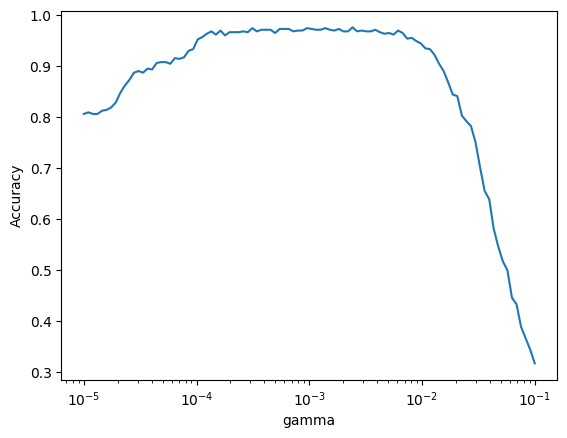

SVC(C=0.0024201282647943836, kernel='linear')

In [ ]:
opt_index = np.argmax(acc)
opt_hyperparameter = gg[opt_index]
print("Optimal gamma: ", opt_hyperparameter)

plt.plot(gg, acc)
plt.xscale('log')
plt.xlabel("gamma")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel = 'linear')
clf.fit(x, y)

### Paso 4
Prepara tus modelos para producción haciendo lo siguiente:

A. Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.

B. Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [ ]:
# Create an SVM model with linear kernel
svm_model = SVC(kernel='linear')

# Evaluation with k-Fold Cross-Validation
print("----- Model evaluation with k-Fold Cross-Validation -----")
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    # Perform hyperparameter grid search for SVM
    parameters = {'C': [0.1, 1, 10]}
    clf_cv = GridSearchCV(svm_model, parameters, cv=5)
    clf_cv.fit(x_train, y_train)

    # Predict on the test set
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Calculate and print the classification report
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Evaluation with cross_val_predict
print("----- Model evaluation with cross_val_predict -----")
clf = GridSearchCV(svm_model, {'C': [0.1, 1, 10]}, cv=5)
y_pred = cross_val_predict(clf, x, y, cv=5)
print(classification_report(y, y_pred))

# Production model
print("----- Production model -----")
clf = GridSearchCV(svm_model, {'C': [0.1, 1, 10]}, cv=5)
clf.fit(x, y)
print(clf.best_estimator_)

----- Model evaluation with k-Fold Cross-Validation -----
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        90
         2.0       0.95      0.98      0.96        90
         3.0       0.97      0.96      0.96        90
         4.0       1.00      0.99      0.99        90
         5.0       0.99      0.96      0.97        90
         6.0       0.91      0.92      0.92        90
         7.0       0.99      1.00      0.99        90

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630

----- Model evaluation with cross_val_predict -----
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98        90
         2.0       0.92      0.98      0.95        90
         3.0       0.94      0.94      0.94        90
         4.0       1.00      0.99      0.99        90
         5.0       0.9

### Paso 5
Contesta lo siguientes:

**A. ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**

Para nada, los datos estaban completamente balanceados para las 7 clases, todos tienen la misma cantidad de muestras: 90

**B. ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**

En general la mayoria de los modelos resultaron tener una presición bastante buena para todas las muestras. Sin embargo, los dos que más se diferenciaron fueron SVM y RBM - SVM. Ambos modelos son enfoques de aprendizaje supervisado, lo que significa que requieren etiquetas de clase en los datos de entrenamiento para aprender a realizar la clasificación. También buscan optimizar funciones de pérdida para entrenar el modelo. Por último, ambos modelos pueden manejar problemas de clasificación no lineales mediante la aplicación de técnicas como el truco del kernel en SVM o mediante la introducción de capas no lineales en la RBM antes de conectarla a SVM.

**C. ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.**

Claro que si, los rendimientos de los datos mejora. De por si los modelos tienen una presición muy alta, al ajustar los datos con hiperparámetros imcrementa la persición general de todos los modelos.

**D. ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**

Problemas de Sobreajuste de Validación Cruzada: Al realizar validación cruzada durante la búsqueda de hiperparámetros, es importante tener en cuenta que los resultados de la validación cruzada pueden estar sesgados si no se manejan adecuadamente. Esto puede llevar a la selección de hiperparámetros subóptimos.

Dificultad para Problemas No Lineales: En problemas no lineales, la búsqueda de hiperparámetros puede ser especialmente desafiante, ya que los efectos de los hiperparámetros pueden ser menos predecibles y más difíciles de interpretar.

In [ ]:
# Guardar en Drive como PDF
!apt-get install -y texlive-xetex

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Prob_Clasif.ipynb' --output-dir='/content/drive/MyDrive/Colab Notebooks'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Prob_Clasif.ipynb to pdf
[NbConvertApp] Support files will be in Prob_Clasif_files/
[NbConvertApp] Making directory ./Prob_Clasif_files
[NbConvertApp] Making directory ./Prob_Clasif_files
[NbConvertApp] Making directory ./Prob_Clasif_files
[NbConvertApp] Making directory ./Prob_Clasif_files
[NbConvertApp] Writing 141504 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 235357 bytes to /content/drive/MyDrive/Colab Notebooks/Prob_Clasif.pdf
